# Análisis exploratorio de los datos de MiBici


MiBici es el sistema de transporte público de bicicletas en la ciudad Guadalajara, México. Implementada desde el año 2014 ha cambiado la forma de movernos en nuestra ciudad. Presta servicio todos los días del año, basado en la renta de bicicletas disponibles en estaciones ubicadas en los puntos más importantes de la ciudad. Puedes obtener el servicio mediante suscripción anual o suscripción temporal por 1, 3 o 7 días.
Debido a la dimensión de datos que se tienen. Se extrajo únicamente los datos disponibles del año 2023 (Enero 2023- Junio 2023), con lo cual se obtuvo una un total de 2,160,648 de filas(viajes).

### Gráficos 
1. Mes del año en el que el uso de servicio es más frecuente
2. Edad de los usuarios
3. Proporción del género 
4. Análisis de días y horas en las que más se usa el servicio.
5. Duración promedio de los viajes

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

archivos = [
    "datos_abiertos_2023_01.csv",
    "datos_abiertos_2023_02.csv",
    "datos_abiertos_2023_03.csv",
    "datos_abiertos_2023_04.csv",
    "datos_abiertos_2023_05.csv",
    "datos_abiertos_2023_06.csv"
]

# Realizamos nuestro df concatenando todos los archivos
datos = pd.concat(
    [pd.read_csv(archivo, encoding='latin1', parse_dates=['Inicio_del_viaje', 'Fin_del_viaje'], dayfirst=True) for
     archivo in archivos]
)

datos

,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id
0,26751198,1350606,M,1983.0,2023-01-01 00:00:00,2023-01-01 00:26:00,154,50
1,26751199,15163,M,1986.0,2023-01-01 00:04:00,2023-01-01 00:07:00,64,79
2,26751200,1534764,M,1987.0,2023-01-01 00:06:00,2023-01-01 00:17:00,35,12
3,26751201,1240140,M,1996.0,2023-01-01 00:08:00,2023-01-01 00:09:00,35,35
4,26751202,1732214,M,1969.0,2023-01-01 00:09:00,2023-01-01 00:14:00,54,171
...,...,...,...,...,...,...,...,...
339623,29290171,201250,M,1984.0,2023-06-30 23:58:14,2023-07-01 00:06:22,53,280
339624,29290173,1024463,M,1988.0,2023-06-30 23:58:42,2023-07-01 00:04:15,61,39
339625,29290174,2413210,M,1994.0,2023-06-30 23:58:53,2023-07-01 00:26:52,87,238
339626,29290175,2357746,M,1998.0,2023-06-30 23:59:39,2023-07-01 00:11:31,47,26


In [105]:
#Iniciamos el análisis obteniendo el total de viajes por mes
datos['Inicio_del_viaje'] = pd.to_datetime(datos['Inicio_del_viaje'])
#Extraemos el mes en otra columna
datos['Mes'] = datos['Inicio_del_viaje'].dt.month
viajes_por_mes = datos['Mes'].value_counts().sort_index()
viajes_por_mes

Mes
1    366018
2    355291
3    402460
4    333093
5    364158
6    339628
Name: count, dtype: int64

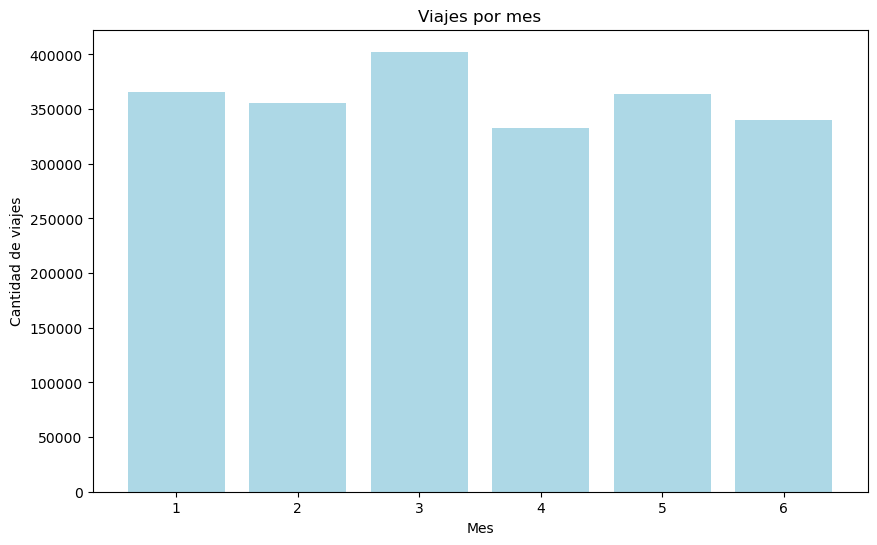

In [106]:
#Realizamos un gráfico de barras para visualizar los viajes realizados por mes.
plt.figure(figsize=(10,6))
plt.bar(viajes_por_mes.index, viajes_por_mes.values, color='lightblue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de viajes')
plt.title('Viajes por mes')
plt.xticks(viajes_por_mes.index)
plt.show()

In [107]:
#Visualizamos las edades de los usuarios, considerando únicamente los Id únicos.
datos_unicos = datos.drop_duplicates(subset='Usuario_Id')
datos_unicos

,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Mes
0,26751198,1350606,M,1983.0,2023-01-01 00:00:00,2023-01-01 00:26:00,154,50,1
1,26751199,15163,M,1986.0,2023-01-01 00:04:00,2023-01-01 00:07:00,64,79,1
2,26751200,1534764,M,1987.0,2023-01-01 00:06:00,2023-01-01 00:17:00,35,12,1
3,26751201,1240140,M,1996.0,2023-01-01 00:08:00,2023-01-01 00:09:00,35,35,1
4,26751202,1732214,M,1969.0,2023-01-01 00:09:00,2023-01-01 00:14:00,54,171,1
...,...,...,...,...,...,...,...,...,...
336018,29286217,2422101,M,1983.0,2023-06-30 18:08:26,2023-06-30 18:31:58,185,50,6
336407,29286651,2423237,M,1997.0,2023-06-30 18:29:13,2023-06-30 18:29:37,131,131,6
337164,29287474,404605,M,1984.0,2023-06-30 19:13:48,2023-06-30 19:18:46,75,72,6
338214,29288649,2423451,F,2005.0,2023-06-30 20:26:53,2023-06-30 20:52:34,272,32,6


In [108]:
#Creamos una columna 'Edad' basado en la fecha de nacimiento.
datos_unicos['Año_de_nacimiento'] = pd.to_numeric(datos_unicos['Año_de_nacimiento'], errors='coerce')
datos_unicos['Edad'] = pd.to_datetime('now').year - datos_unicos['Año_de_nacimiento']
datos_unicos = datos_unicos[(datos_unicos['Edad'].notnull()) & (datos_unicos['Edad'] > 0)]

C:\Users\User\AppData\Local\Temp\ipykernel_7736\2147288542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_unicos['Año_de_nacimiento'] = pd.to_numeric(datos_unicos['Año_de_nacimiento'], errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_7736\2147288542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_unicos['Edad'] = pd.to_datetime('now').year - datos_unicos['Año_de_nacimiento']


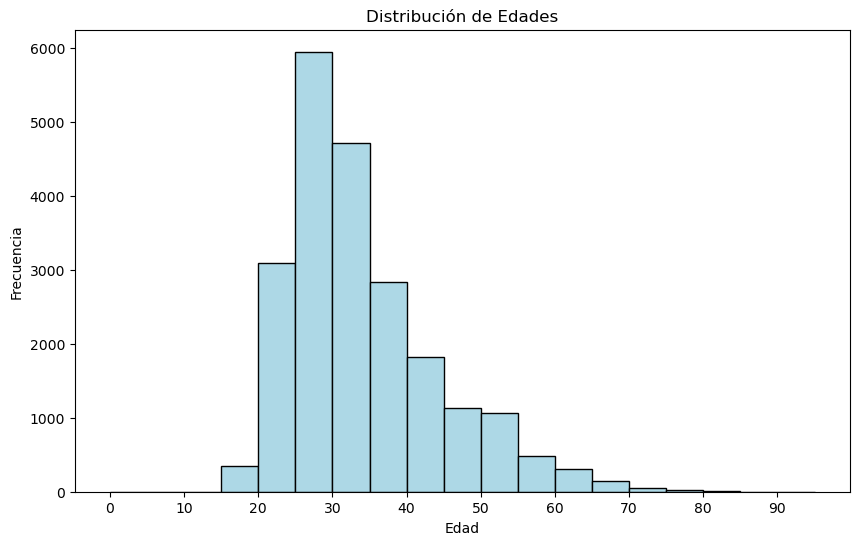

In [109]:
#Histograma de edades
plt.figure(figsize=(10,6))
plt.hist(datos_unicos['Edad'], bins=range(0, 100, 5), edgecolor='black', color='lightblue')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades')
plt.xticks(range(0, 100, 10))
plt.show()

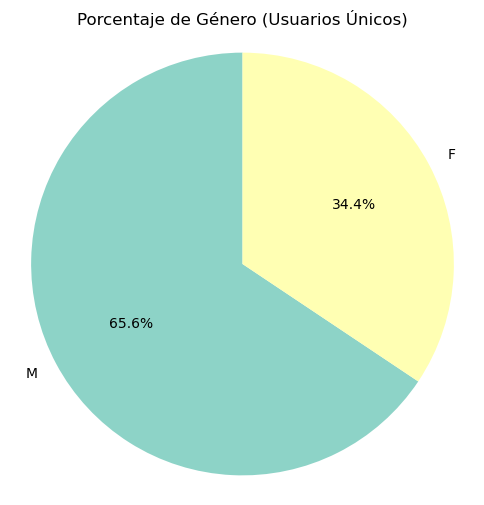

In [111]:
# Porcentaje de género de usuarios únicos
genero_porcentaje = datos_unicos['Genero'].value_counts(normalize=True) * 100

# Gráfico de pastel del porcentaje de género
plt.figure(figsize=(6, 6))
plt.pie(genero_porcentaje, labels=genero_porcentaje.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.axis('equal')
plt.title('Porcentaje de Género (Usuarios Únicos)')
plt.show()

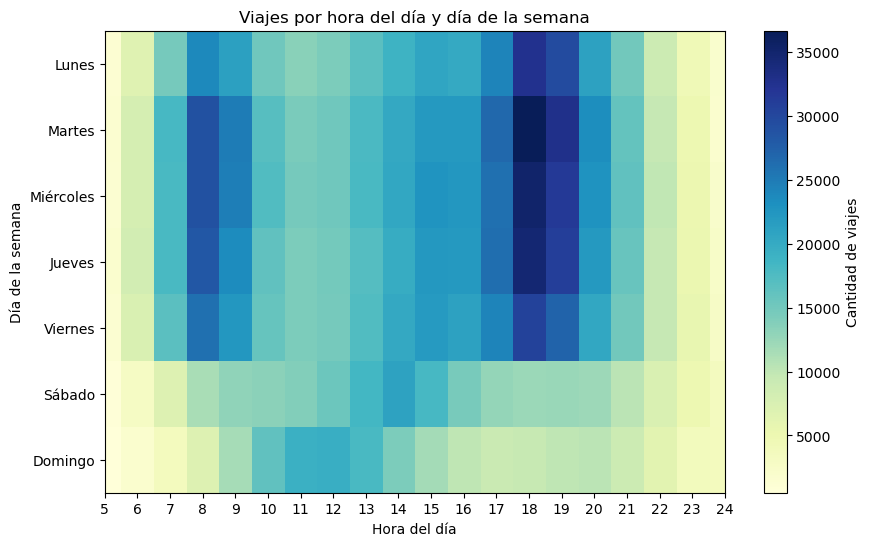

In [133]:
# Análisis de viajes por día de la semana y hora
datos['Dia_semana'] = datos['Inicio_del_viaje'].dt.dayofweek
datos['Hora'] = datos['Inicio_del_viaje'].dt.hour

# Crear una nueva columna 'Hora_display' para visualización de las horas
datos['Hora_display'] = datos['Hora'].replace({0: 24})

matriz_frecuencia = pd.pivot_table(datos, values='Viaje_Id', index='Dia_semana', columns='Hora_display', aggfunc='count')

# Heatmap
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
horas = range(5, 25)  # Rango de horas de servicio (5 am a 1 am del día siguiente)

plt.figure(figsize=(10, 6))
plt.imshow(matriz_frecuencia, cmap='YlGnBu', aspect='auto')

# Ajustar los ticks y etiquetas de los ejes
plt.xticks(np.arange(len(horas)), horas)
plt.yticks(np.arange(len(dias_semana)), dias_semana)

# Configurar límites del eje x y etiquetas
plt.xlim(0, len(horas)-1)
plt.xlabel('Hora del día')
plt.ylabel('Día de la semana')

# Agregar una barra de color a la derecha del gráfico
plt.colorbar(label='Cantidad de viajes')

plt.title('Viajes por hora del día y día de la semana')
plt.show()


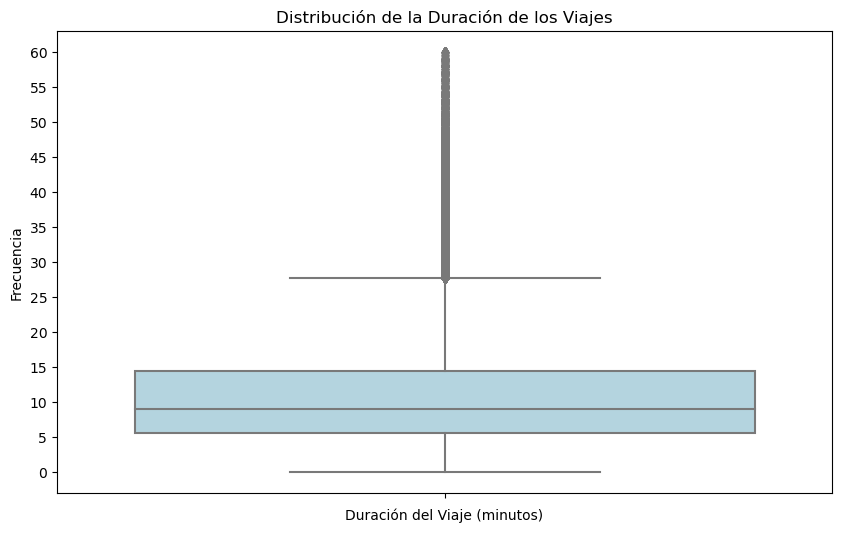

In [114]:
# Convertir las columnas 'Inicio_del_viaje' y 'Fin_del_viaje' al tipo datetime
datos['Inicio_del_viaje'] = pd.to_datetime(datos['Inicio_del_viaje'])
datos['Fin_del_viaje'] = pd.to_datetime(datos['Fin_del_viaje'])

# Calcular la duración de los viajes en minutos
datos['Duracion_minutos'] = (datos['Fin_del_viaje'] - datos['Inicio_del_viaje']).dt.total_seconds() / 60

# Filtrar viajes que duran más de una hora
datos = datos[datos['Duracion_minutos'] <= 60]

# Crear un gráfico de caja de la duración de los viajes
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos, y='Duracion_minutos', color='lightblue')
plt.yticks(range(0, int(datos['Duracion_minutos'].max()) + 5, 5))
plt.xlabel('Duración del Viaje (minutos)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Duración de los Viajes')
plt.show()